<h1> Содержание </h1>

* [Название проекта.](#Name)
    -  [Цели и задачи исследования.](#goals)
    -  [Исходные данные.](#data)
1. [Обзор данных, изменение типов, подсчет и добавление данных в таблицу.](#overview)
    - [1.1 Изучение файлов с данными, получение общей информации, загрузка библиотек.](#start)
    - [1.2 Таблица Calls (инфомация о звонках)](#calls)
    - [1.3 Таблица Internet (информация об интернет-сессиях)](#internet)
    - [1.4 Таблица Messages (информация о сообщениях)](#messages)
    - [1.5 Таблица Users (информация о пользователях)](#users)
2. [Группировка и объединение таблиц](#pivot)
3. [Подсчет и добавление помесячной выручки с каждого пользователя](#income)
4. [Подсчет среднего, стандартного отклонения и дисперсии для пользователей обоих тарифов. Построение гистограмм.](#count)
5. [Проверка гипотез](#hypothesis)
6. [Общий вывод](#con)


<a id='Name'></a>
# Определение перспективного тарифа для телеком-компании

<a id='goals'></a>
**Цели и задачи исследования:**
1. Подготовить данные к анализу.
2. Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
3. Проверить гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
4. Составить выводы на основе полученных результатов. 


<a id='data'></a>
**Исходные данные:** данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Описание данных**

Таблица `users` (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

Таблица `calls` (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a id='overview'></a>
## Обзор данных, изменение типов, подсчет и добавление данных в таблицу.

<a id='start'></a>
###  Изучение файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

<a id='calls'></a>
###  Таблица Calls

In [2]:
calls.info()
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month


calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int8')

display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


За исключением неправильного формата даты таблица вполне корректна. Переведем дату звонка в столбце call_date в формат %Y-%m-%d и создадим новый столбец с месяцами методом dt.month. Этот столбец пригодится нам для дальнейших расчетов. 
По заданию ясно, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Поэтому округляем столбец с длительностью звонка методом np.ceil. Также изменим тип столбца на Int. Ознакомившись с таблицей функцией describe() видим, что максимальная продолжительность звонка составляла 38 минут, следовательно для сохранения нескольких процентов памяти приведем столбец к типу Int8. Это будет полезно, не смотря на то, что этот датасет небольшого размера. 

<a id='internet'></a>
### Таблица Internet

In [5]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [6]:
internet.info()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month

display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Проведем те же действия с таблицей, содержащей информацию об интернет-сессиях пользователей. Переведем столбец session_date в формат %Y-%m-%d и добавим столбец с месяцами. Округлим в большую сторону объем потраченного интернет-трафика и приведем его к типу Int16 (максимальное значение в этом столбце 1724.83) 

<a id='messages'></a>
### Таблица Messages

In [9]:
messages.info()
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
display(messages.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Также приведем дату из столбца message_date к формату %Y-%m-%d и создадим новый столбец с месяцами. 

<a id='users'></a>
### Таблица Users 

In [11]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [12]:
users.info()
display(users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'].fillna('2019-01-01', inplace=True)
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

В таблице с информацией о пользователях видим большое количество пропусков в столбце с датой прекращения пользования тарифом. Предположим, что это означет, что пользователь продолжает им пользоваться и заполним пропуски на 1 января 2019 года. Как и в предыдущим таблицах изменим формат даты в столбцах reg_date и churn_date. 

<a id='pivot'></a>
##  Группировка и объединение таблиц

In [14]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_pivot.columns = ['calls_duration', 'calls_amount']
calls_pivot = calls_pivot.reset_index()
display(calls_pivot.head(10))

,user_id,month,calls_duration,calls_amount
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
5,1000,10,350.0,57
6,1000,11,338.0,43
7,1000,12,333.0,46
8,1001,11,430.0,59
9,1001,12,414.0,63


Сгруппируем таблицу с информацией о звонках пользователей по user_id и month. Подсчитаем общую длительность звонков и их количество помесячно. Также переименуем столбцы во избежания путаницы в дальнейшем слиянии таблиц. 

In [15]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_pivot['mb_used'] = np.ceil(internet_pivot['mb_used'])
internet_pivot['mb_used'] = internet_pivot['mb_used'].astype('int64')
display(internet_pivot.head(10))

,user_id,month,mb_used
0,1000,5,2254
1,1000,6,23234
2,1000,7,14004
3,1000,8,14056
4,1000,9,14569
5,1000,10,14703
6,1000,11,14757
7,1000,12,9818
8,1001,11,18430
9,1001,12,14037


Те же действия проведем с таблицей с интернет-трафиком, подсчитаем сумму затраченного трафика по месяцам.

In [16]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_pivot.columns = ['messages_amount']
messages_pivot = messages_pivot.reset_index()
display(messages_pivot.head(10))

,user_id,month,messages_amount
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Тоже самое, что и с интернет-трафиком: подсчитаем сумму сообщений, отправленных пользователями в месяц и переименуем столбец. 

In [17]:
calls_internet = calls_pivot.merge(internet_pivot, on=['user_id', 'month'], how='outer')
calls_internet_messages = calls_internet.merge(messages_pivot, on=['user_id', 'month'], how='outer').reset_index()
display(calls_internet_messages.head(10))

,index,user_id,month,calls_duration,calls_amount,mb_used,messages_amount
0,0,1000,5,159.0,22.0,2254.0,22.0
1,1,1000,6,172.0,43.0,23234.0,60.0
2,2,1000,7,340.0,47.0,14004.0,75.0
3,3,1000,8,408.0,52.0,14056.0,81.0
4,4,1000,9,466.0,58.0,14569.0,57.0
5,5,1000,10,350.0,57.0,14703.0,73.0
6,6,1000,11,338.0,43.0,14757.0,58.0
7,7,1000,12,333.0,46.0,9818.0,70.0
8,8,1001,11,430.0,59.0,18430.0,NaN
9,9,1001,12,414.0,63.0,14037.0,NaN


Объединим таблицы со звонками и интернет-трафиком методом .merge. Затем присоединим к ним датасет с информацией о сообщениях. 

In [18]:
df = calls_internet_messages.merge(users, on='user_id', how='left')
df = df.pivot_table(
    index=['user_id', 'first_name', 'last_name', 'city', 'age', 'tariff', 'reg_date', 'churn_date', 'month']
    ).reset_index()
display(df.head(10))

,user_id,first_name,last_name,city,age,tariff,reg_date,churn_date,month,calls_amount,calls_duration,index,mb_used,messages_amount
0,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,5,22.0,159.0,0,2254.0,22.0
1,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,6,43.0,172.0,1,23234.0,60.0
2,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,7,47.0,340.0,2,14004.0,75.0
3,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,8,52.0,408.0,3,14056.0,81.0
4,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,9,58.0,466.0,4,14569.0,57.0
5,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,10,57.0,350.0,5,14703.0,73.0
6,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,11,43.0,338.0,6,14757.0,58.0
7,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,12,46.0,333.0,7,9818.0,70.0
8,1001,Иван,Ежов,Москва,41,smart,2018-11-01,2019-01-01,11,59.0,430.0,8,18430.0,NaN
9,1001,Иван,Ежов,Москва,41,smart,2018-11-01,2019-01-01,12,63.0,414.0,9,14037.0,NaN


К таблице со звонками, интернет-трафиком и сообщениями присоединим датасет с информацией о пользователях. Для более лучшего восприятия методом .pivot_table() переместим столбцы таблицы в удобном для нас порядке. 

In [19]:
df['gb_used'] = df['mb_used'] / 1024
df['gb_used'] = np.ceil(df['gb_used'])
display(df.head(10))

,user_id,first_name,last_name,city,age,tariff,reg_date,churn_date,month,calls_amount,calls_duration,index,mb_used,messages_amount,gb_used
0,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,5,22.0,159.0,0,2254.0,22.0,3.0
1,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,6,43.0,172.0,1,23234.0,60.0,23.0
2,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,7,47.0,340.0,2,14004.0,75.0,14.0
3,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,8,52.0,408.0,3,14056.0,81.0,14.0
4,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,9,58.0,466.0,4,14569.0,57.0,15.0
5,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,10,57.0,350.0,5,14703.0,73.0,15.0
6,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,11,43.0,338.0,6,14757.0,58.0,15.0
7,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,12,46.0,333.0,7,9818.0,70.0,10.0
8,1001,Иван,Ежов,Москва,41,smart,2018-11-01,2019-01-01,11,59.0,430.0,8,18430.0,NaN,18.0
9,1001,Иван,Ежов,Москва,41,smart,2018-11-01,2019-01-01,12,63.0,414.0,9,14037.0,NaN,14.0


Переведем мегабайты использованного интернет-трафика в гигабайты и округлим их в большую сторону.

In [20]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<a id='income'></a>
## Подсчет и добавление помесячной выручки с каждого пользователя.

In [21]:
def revenue(row):
    if row['tariff'] == 'smart':
        if row['messages_amount'] > 50:
            income_messages = (row['messages_amount'] - 50) * 3 #умножаем на 3 согласно тарифу
        else:
            income_messages = 0
            
        if row['gb_used'] > 15:
            income_internet = (row['gb_used'] - 15) * 200 
        else:
            income_internet = 0
            
        if row['calls_duration'] > 500:
            income_calls = (row['calls_duration'] - 500) * 3 
        else:
            income_calls = 0
        income = income_messages + income_internet + income_calls + 550
    
    if row['tariff'] == 'ultra':
        if row['messages_amount'] > 1000:
            income_messages = (row['messages_amount'] - 1000) * 1
        else:
            income_messages = 0
            
        if row['gb_used'] > 30:
            income_internet = (row['gb_used'] - 30) * 150 
        else:
            income_internet = 0
            
        if row['calls_duration'] > 3000:
            income_calls = (row['calls_duration'] - 3000) * 1
        else:
            income_calls = 0
        income = income_messages + income_internet + income_calls + 1950
    return income
            
df['income'] = df.apply(revenue, axis=1)
display(df.head(20))

,user_id,first_name,last_name,city,age,tariff,reg_date,churn_date,month,calls_amount,calls_duration,index,mb_used,messages_amount,gb_used,income
0,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,5,22.0,159.0,0,2254.0,22.0,3.0,1950.0
1,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,6,43.0,172.0,1,23234.0,60.0,23.0,1950.0
2,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,7,47.0,340.0,2,14004.0,75.0,14.0,1950.0
3,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,8,52.0,408.0,3,14056.0,81.0,14.0,1950.0
4,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,9,58.0,466.0,4,14569.0,57.0,15.0,1950.0
5,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,10,57.0,350.0,5,14703.0,73.0,15.0,1950.0
6,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,11,43.0,338.0,6,14757.0,58.0,15.0,1950.0
7,1000,Рафаил,Верещагин,Краснодар,52,ultra,2018-05-25,2019-01-01,12,46.0,333.0,7,9818.0,70.0,10.0,1950.0
8,1001,Иван,Ежов,Москва,41,smart,2018-11-01,2019-01-01,11,59.0,430.0,8,18430.0,NaN,18.0,1150.0
9,1001,Иван,Ежов,Москва,41,smart,2018-11-01,2019-01-01,12,63.0,414.0,9,14037.0,NaN,14.0,550.0


Напишем функцию для подсчета помесячной выручки с каждого пользователя согласно их тарифам. Вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножаем на значение из тарифного плана и прибававляем абонентскую плату, соответствующую тарифному плану. Применим функцию к датасету методом .apply(), в результате получаем столбец income с нужной нам информацией. 

<a id='count'></a>
## Подсчет среднего, стандартного отклонения и дисперсии для пользователей обоих тарифов. Построение гистограмм. 

### Тариф "Смарт"

In [22]:
df_smart = df.query('tariff == "smart"')

print('Среднее:', df_smart['income'].mean())
print()
print('Стандартное отклонение:', np.std(df_smart['income']))
print()
variance_smart = np.var(df_smart['income'], ddof=1)
print('Дисперсия:', variance_smart)

Среднее: 1289.9735307312696

Стандартное отклонение: 818.2207653949051

Дисперсия: 669785.7080064242


Создадим выборку с пользователями тарифа "смарт" и посчитаем для нее среднее, стандартное отклонение и дисперсию. 
Cтандартное отклонение равно 780, довольно большой разброс относительно среднего. Это может говорить о том, что пользователи "смарт" часто выходят за лимиты своего тарифа.  

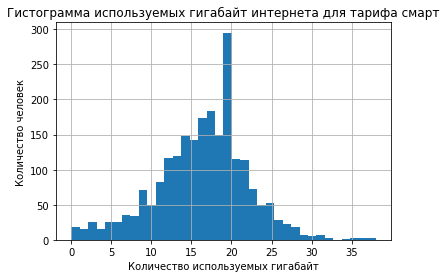

In [23]:
plt.hist(x=df_smart['gb_used'], bins='auto')
plt.xlabel('Количество используемых гигабайт')
plt.ylabel('Количество человек')
plt.title('Гистограмма используемых гигабайт интернета для тарифа смарт')
plt.grid(True)
plt.show;

Построим гистограмму используемых гигабайт интернет-трафика для пользователей тарифа "смарт". Как и предполагалось, большое количество пользователей использует больше 15 гб интернета, включенных в абонентскую плату.

In [24]:
print('Среднее:', df_smart['gb_used'].mean())
print()
print('Стандартное отклонение:', np.std(df_smart['gb_used']))
print()
variance_smart_gb = np.var(df_smart['gb_used'], ddof=1)
print('Дисперсия:', variance_smart_gb)

Среднее: 16.33617594254937

Стандартное отклонение: 5.73663477609674

Дисперсия: 32.92375582354312


Стандартное отклонение в случае с количеством использованных гигабайтов интернета равно 5,7. Это подтверждает построенная нами ранее гистограмма.  

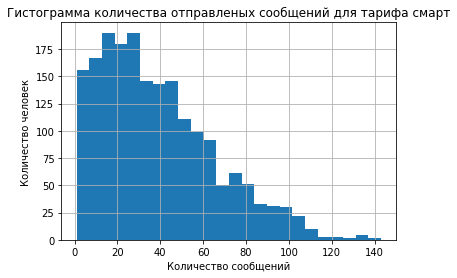

In [25]:
plt.hist(x=df_smart['messages_amount'], bins='auto')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество человек')
plt.title('Гистограмма количества отправленых сообщений для тарифа смарт')
plt.grid(True)
plt.show;

По гистограмме количества сообщений для тарифа "смарт" можно сделать вывод, что большинство пользователей укладывается в лимит своего тарифа. 

In [26]:
print('Среднее:', df_smart['messages_amount'].mean())
print()
print('Стандартное отклонение:', np.std(df_smart['messages_amount']))
print()
variance_smart_ms = np.var(df_smart['messages_amount'], ddof=1)
print('Дисперсия:', variance_smart_ms)

Среднее: 38.71644120707596

Стандартное отклонение: 26.780979129042816

Дисперсия: 717.5942011753547


Отклонение в 26,8 подтверждает, что очень малое количество пользователей тарифа "смарт" выходят за свои лимиты сообщений. 

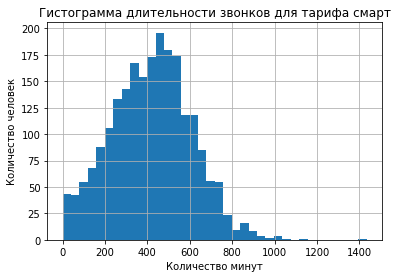

In [27]:
plt.hist(x=df_smart['calls_duration'], bins='auto')
plt.xlabel('Количество минут')
plt.ylabel('Количество человек')
plt.title('Гистограмма длительности звонков для тарифа смарт')
plt.grid(True)
plt.show;

Гистограмма длительности звонков показывает, что пользователи "смарт", как и в случае с сообщениями, укладываются в лимиты своего тарифного плана. 

In [28]:
print('Среднее:', df_smart['calls_duration'].mean())
print()
print('Стандартное отклонение:', np.std(df_smart['calls_duration']))
print()
variance_smart_calls = np.var(df_smart['calls_duration'], ddof=1)
print('Дисперсия:', variance_smart_calls)

Среднее: 419.0629779577148

Стандартное отклонение: 189.2830296395594

Дисперсия: 35844.1895513438


В звонках также без неожиданностей, с лимитом в 500 минут среднее составлят 419, а отклонение 189.

### Тариф "Ультра". 

In [29]:
df_ultra = df.query('tariff == "ultra"')

print('Среднее:', df_ultra['income'].mean())
print()
print('Стандартное отклонение:', np.std(df_ultra['income']))
print()
variance_ultra = np.var(df_ultra['income'])
print('Дисперсия:', variance_ultra)

Среднее: 2070.1522842639592

Стандартное отклонение: 375.9961080333192

Дисперсия: 141373.07325620347


Проведем те же расчеты для пользователей тарифа "ультра". Стандартное отклонение здесь намного меньше, чем у пользователей "смарт", значит можно предположить, что большинство пользователей "ультра" не выходят за лимиты своего тарифного плана. 

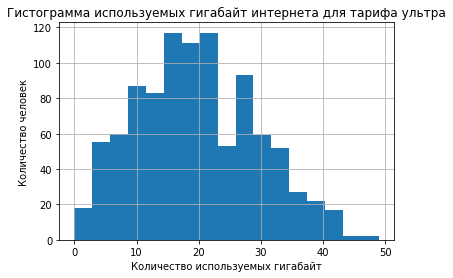

In [30]:
plt.hist(x=df_ultra['gb_used'], bins='auto')
plt.xlabel('Количество используемых гигабайт')
plt.ylabel('Количество человек')
plt.title('Гистограмма используемых гигабайт интернета для тарифа ультра')
plt.grid(True)
plt.show;

Теперь посмотрим на выборку пользователей тарифа "ультра". 
Построим гистограмму используемого интернет-трафика. Взглянув на него можно с уверенностью сказать, что очень малое количество пользователей выходят за лимиты своего тарифа и используют меньше 30 гб интернет-трафика, включенного в абонентскую плату. 

In [31]:
print('Среднее:', df_ultra['gb_used'].mean())
print()
print('Стандартное отклонение:', np.std(df_ultra['gb_used']))
print()
variance_ultra_gb = np.var(df_ultra['gb_used'])
print('Дисперсия:', variance_ultra_gb)

Среднее: 19.694358974358973

Стандартное отклонение: 9.697946860394463

Дисперсия: 94.05017330703484


Среднее количество используемых гигабайтов трафика для пользователей "Ультра" составляет 18. Стандартное отклонение в 8 подтверждает нам то, что пользователей, выходящих за лимиты своего тарифного плата практически нет.

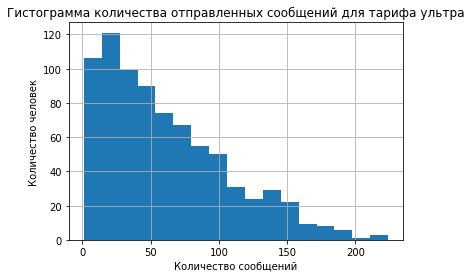

In [32]:
plt.hist(x=df_ultra['messages_amount'], bins='auto')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество человек')
plt.title('Гистограмма количества отправленных сообщений для тарифа ультра')
plt.grid(True)
plt.show;

Построим гистограмму количества сообщений. Не смотря на лимит в 1000 сообщений, большинство пользователей "ультра" вполне укладываются в 60.

In [33]:
print('Среднее:', df_ultra['messages_amount'].mean())
print()
print('Стандартное отклонение:', np.std(df_ultra['messages_amount']))
print()
variance_ultra_ms = np.var(df_ultra['messages_amount'])
print('Дисперсия:', variance_ultra_ms)

Среднее: 61.161006289308176

Стандартное отклонение: 45.90212983637779

Дисперсия: 2107.0055235156838


С сообщениями отклонение равно 45, среднее 61. С учетом лимита в 1000 можно сделать вывод, что эта услуга не пользуется спросом у пользователей тарифа "Ультра". 

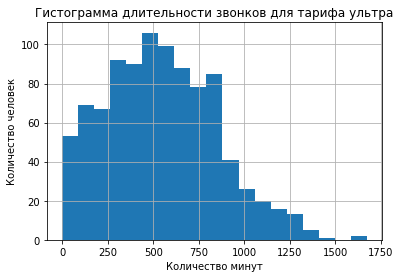

In [34]:
plt.hist(x=df_ultra['calls_duration'], bins='auto')
plt.xlabel('Количество минут')
plt.ylabel('Количество человек')
plt.title('Гистограмма длительности звонков для тарифа ультра')
plt.grid(True)
plt.show;

По гистограмме продолжительности звонков ситуация примерно такая же, пользователи спокойно укладываются в лимиты своего тарифа в 3000 минут, очень малое количество пользователей выходит за рамки 750.   

In [35]:
print('Среднее:', df_ultra['calls_duration'].mean())
print()
print('Стандартное отклонение:', np.std(df_ultra['calls_duration']))
print()
variance_ultra_calls = np.var(df_ultra['calls_duration'])
print('Дисперсия:', variance_ultra_calls)

Среднее: 545.4511041009464

Стандартное отклонение: 306.7643414314314

Дисперсия: 94104.36117385981


Со звонками все также как и в случае с сообщениями, большинство пользователей тарифа "Ультра" не доходят даже до трети своего лимита в тарифном плане.

<a id='hypothesis'></a>
## Проверка гипотез.

**Сформируем гипотезы о различии выручки пользователей разных тарифов:**
- Нулевая гипотеза: выручка пользователей тарифов смарт и ультра равны.
- Альтернативная гипотеза: выручка различается.

In [36]:
alpha = .05

results = st.ttest_ind(df_smart['income'], df_ultra['income'], equal_var = False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о равенстве выручки пользователей тарифов.

**Сформулируем гипотезы о выручке пользователей из Москвы и других регионов:**
- Нулевая гипотеза: средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов;
- Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [37]:
moscow = df.query('city == "Москва"')['income']
others = df.query('city != "Москва"')['income']

alpha = .05

results = st.ttest_ind(moscow, others)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Гипотезу о равенстве выручки пользователей Москвы и других регионов не отвергнута, следовательно гипотеза об отличии средней выручки пользователей из Москвы и из других регионов НЕ подтверждается.

<a id='con'></a>
## Общий вывод

В результате исследования мы выяснили:
1. Пользователи тарифа "Смарт", в отличии от "Ультра", часто выходят за лимиты интернет-трафика своего тарифа и приобретают дополнительные гигабайты трафика.
2. Услуги СМС и звонков не пользуются таким большим спросом, как интернет. Пользователи обоих тарифов в подавляющем большинстве  укладываются в свои лимиты.
3. Пользователи тарифа "Смарт" часто переплачивают больше свой абонентской платы. В среднем на 1295-550 = 745 рублей, в большинстве своем вся дополнительная плата идет за счет покупки дополнительных гигабайт интернета. 
4. Выручка пользователей "Ультра" в среднем составляет 2071 рублей, при абонентской плате в 1950 рублей можно сделать вывод, что очень малое количество пользователей платят больше, чем стоимость их тарифа. 

Также были проверены две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотеза о различии выручки пользователей тарифов подтвердилась, отличие выручки пользователей из Москвы и пользователей других регионов НЕ подтвердилась. 

Исходя из полученных результатов можно сделать вывод, что тариф "Смарт" выглядит перспективнее тарифа "Ультра". Я бы советовал продвигать именно его. 